In [2]:
# import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score


# NN packages
import os
import time

import scipy as sci
import scipy.io as sio

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras


from numpy.random import seed
seed(100)

from IPython.display import clear_output

In [3]:
# train = pd.read_excel('lendingclub_traindata.xlsx')
# validation=pd.read_excel('lendingclub_valdata.xlsx')
# test = pd.read_excel('lendingclub_testdata.xlsx')

df = pd.read_excel("lending_clubFull_Data_Set.xlsx")

# 1 = good, 0 = default

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = df.drop(columns = ['loan_status']).copy()
y = df['loan_status']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(20000, 134)
(20000,)
(2500, 134)
(2500,)
(2500, 134)
(2500,)


(None, None)

## Still in progress up to here 
- Plan to update columns and run LR before starting NN

In [3]:
#give column names
cols = ['home_ownership', 'income', 'dti', 'fico', 'loan_status']

train.columns = validation.columns=test.columns = cols

print(train.head())
print("--------------------------------")
print (validation.head())
print("--------------------------------")
print(test.head())


# remove target column to create feature only dataset
X_train = train.drop('loan_status', 1)
X_val=validation.drop('loan_status', 1)
X_test = test.drop('loan_status', 1)

# Scale data using the mean and standard deviation of the training set. 
# This is not necessary for the simple logistic regression we will do here 
# but should be done if L1 or L2 regrularization is carried out
X_test=(X_test-X_train.mean())/X_train.std()
X_val=(X_val-X_train.mean())/X_train.std()
X_train=(X_train-X_train.mean())/X_train.std()

# store target column as y-variables 
y_train = train['loan_status']
y_val=validation['loan_status']
y_test = test['loan_status']

#print first five instances for each data set

print(X_train.head())
print("--------------------------------")
print(X_val.head())
print("--------------------------------")
print(X_test.head())

print(X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape, y_test.shape)
X_train.columns

   home_ownership    income       dti      fico
0        0.809651 -0.556232  0.053102 -0.163701
1       -1.234923 -0.451393  1.307386  1.262539
2       -1.234923 -0.186349 -0.148259 -0.639114
3       -1.234923 -0.663060  1.769728 -1.114527
4        0.809651  0.800204  0.974410 -0.956056
--------------------------------
   home_ownership    income       dti      fico
0       -1.234923 -0.911538  1.080153 -1.114527
1       -1.234923 -0.451393  0.395077  0.628655
2        0.809651  0.468899 -1.108940  2.371837
3       -1.234923  0.008753 -1.826638 -0.322172
4        0.809651  0.063971 -0.212379 -0.480643
--------------------------------
   home_ownership    income       dti      fico
0        0.809651 -0.407219  0.747177 -0.956056
1        0.809651  1.389190 -0.107762  2.847250
2        0.809651  0.468899  0.328707  0.470184
3       -1.234923  0.413681 -0.549855  0.311713
4        0.809651  0.468899  0.684181 -0.322172
(7000, 4) (7000,) (3000, 4) (3000,) (2290, 4) (2290,)


Index(['home_ownership', 'income', 'dti', 'fico'], dtype='object')

In [4]:
freq = y_train.value_counts()           # count frequency of different classes in training swet
freq/sum(freq)*100                      # get percentage of above

1    79.171429
0    20.828571
Name: loan_status, dtype: float64

In [5]:
#Create an ionstance of logisticregression named lgstc_reg 

lgstc_reg =  LogisticRegression(penalty="none",solver="newton-cg")     

# Fit logististic regression to training set

lgstc_reg.fit(X_train, y_train)                                        # fit training data on logistic regression 


print(lgstc_reg.intercept_, lgstc_reg.coef_)                           # get the coefficients of each features

[1.4162429] [[ 0.14531037  0.03366005 -0.32404502  0.36315462]]


When used on scaled data the model has a bias of 1.416 and coefficients of 0.145, 0.034, -0.324 and 0.363. We now test the model on the validation set.

In [6]:
# y_train_pred, y_val_pred, and y_test_pred are the predicted probabilities for the training set
# validation set and test set using the fitted logistic regression model

y_train_pred=lgstc_reg.predict_proba(X_train)
y_val_pred=lgstc_reg.predict_proba(X_val)
y_test_pred=lgstc_reg.predict_proba(X_test)

# Calculate maximum likelihood for training set, validation set, and test set

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

# Calculate cost functions from maximum likelihoods

cost_function_training=np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val=np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test=np.negative(np.sum(mle_vector_test)/len(y_test))

print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)



cost function training set = 0.49111143543170926
cost function validation set = 0.4860713220392096
cost function test set = 0.48467054875810117


<br> 
An analyst must decide on a criterion for predicting whether loan will be good or default. This involves specifying a threshold By default this threshold is set to 0.5, i.e., loans are separated into good and bad categories according to whether the probability of no default is greater or less than 0.5. However this does not work well for an imbalanced data set such as this. It would predict that all loans are good! We will look at the results for few other thresholds. 



In [7]:
THRESHOLD = [.75, .80, .85]
# Create dataframe to store resultd
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      

# Iterate over the 3 thresholds

for i in THRESHOLD:                                                                                       
    
    
    #lgstc_reg.fit(X_train, y_train)                                                                    
    
    
    # If prob for test set > threshold predict 1
    preds = np.where(lgstc_reg.predict_proba(X_test)[:,1] > i, 1, 0)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100                   # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)

    
    
   

Confusion matrix for threshold = 0.75
[[60.82969432 18.34061135]
 [11.70305677  9.12663755]]
 
Confusion matrix for threshold = 0.8
[[42.70742358 36.4628821 ]
 [ 6.4628821  14.36681223]]
 
Confusion matrix for threshold = 0.85
[[22.7510917  56.41921397]
 [ 3.01310044 17.81659389]]
 
ALL METRICS
                       0         1         2
THRESHOLD           0.75       0.8      0.85
accuracy        0.699563  0.570742  0.405677
true pos rate    0.76834  0.539437  0.287369
true neg rate   0.438155  0.689727  0.855346
false pos rate  0.561845  0.310273  0.144654
precision       0.838651  0.868561  0.883051
f-score         0.801957  0.665532  0.433625


<br>
This table shows that there is a trade off betwee the true positive rate and the false positive rate.  
We can improve the percentage of good loans we identify only by increasing the percentage of bad that are misclassified.
The receiver operating curve (ROC) captures this trade off by considering different thresholds.

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.6577628841779786


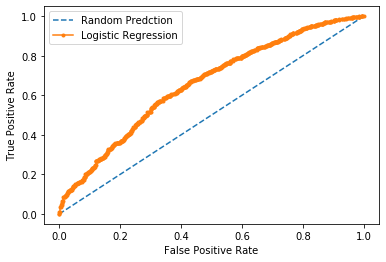

In [8]:

# Calculate the receiver operating curve and the AUC measure

lr_prob=lgstc_reg.predict_proba(X_test)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()